# Task:

1. Setup and Data Preparation:
- Import necessary libraries such as `pandas`, `matplotlib`, `seaborn`, and `scikit-learn`.  
- Load the dataset for regression analysis.  
- Conduct exploratory data analysis (EDA) to understand the dataset.  
- Preprocess the data by handling missing values, encoding categorical variables, and normalizing/standardizing features if needed.  

2. Simple Linear Regression:
- Select one independent variable (predictor) and one dependent variable (response).  
- Train a Simple Linear Regression model using the selected variables.  
- Visualize the regression line on a scatter plot to show the relationship between the predictor and response variable.  

3. Multiple Linear Regression:
- Select multiple independent variables (predictors) and one dependent variable (response).  
- Train a Multiple Linear Regression model using the selected features.  
- Analyze the regression coefficients to understand the impact of each predictor on the response variable.  

4. Model Evaluation:
- Calculate evaluation metrics for both Simple and Multiple Linear Regression models:  
  - Mean Squared Error (MSE)  
  - Mean Absolute Error (MAE)  
  - R-squared (R²)  
  - Adjusted R-squared (Adjusted R²)  
- Compare the performance of both models and justify the results.

5. Residual Analysis:
- Perform residual analysis to validate the assumptions of Linear Regression:  
  - Linearity  
  - Homoscedasticity (constant variance)  
  - Independence of errors  
  - Normality of residuals  

6. Model Optimization:
- Identify and remove irrelevant or highly correlated predictors to improve the model's performance.  
- Assess the impact of feature selection on the R-squared and Adjusted R-squared values.  

In [ ]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
# Load dataset
df = pd.read_csv('50_Startups.csv')

In [ ]:
# Display the first 5 rows
display(df.head())

# Display the last 5 rows
display(df.tail())

# Get information about the DataFrame
display(df.info())

# Get descriptive statistics of the DataFrame
display(df.describe())

# Check for missing values
display(df.isnull().sum())

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


,R&D Spend,Administration,Marketing Spend,State,Profit
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


None

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


,0
R&D Spend,0
Administration,0
Marketing Spend,0
State,0
Profit,0


Let's visualize the relationships between the numerical features and the target variable ('Profit').

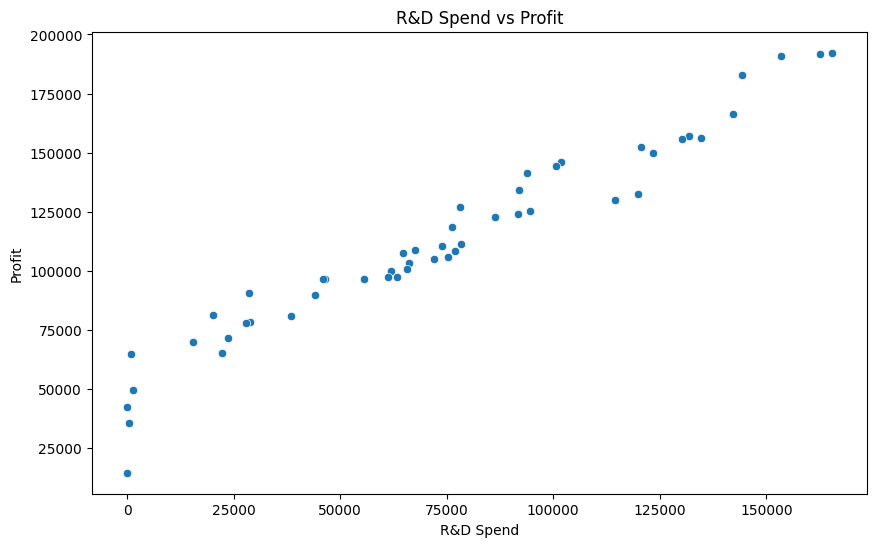

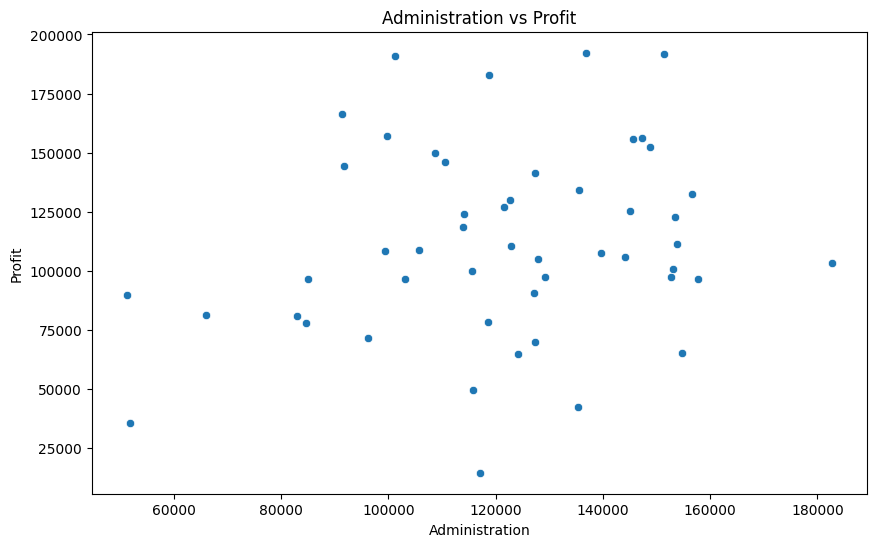

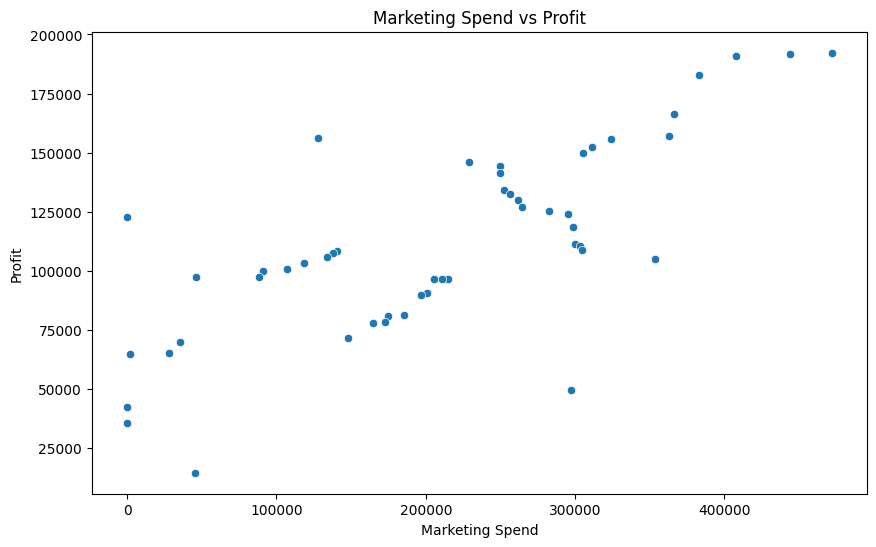

In [ ]:
# Visualize the relationships between numerical features and the target variable
numerical_features = ['R&D Spend', 'Administration', 'Marketing Spend']
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=feature, y='Profit', data=df)
    plt.title(f'{feature} vs Profit')
    plt.show()

Now, let's analyze the categorical variable 'State'.

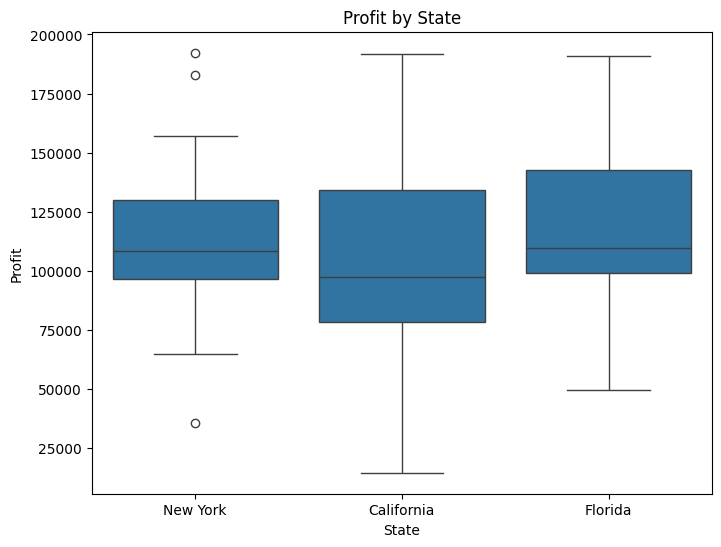

,count
State,
New York,17
California,17
Florida,16


In [ ]:
# Analyze the categorical variable 'State'
plt.figure(figsize=(8, 6))
sns.boxplot(x='State', y='Profit', data=df)
plt.title('Profit by State')
plt.show()

display(df['State'].value_counts())

**EDA Interpretation:**

*   'R&D Spend' shows a strong positive correlation with 'Profit', suggesting it's a key predictor.
*   'Marketing Spend' has a moderate positive correlation with 'Profit'.
*   'Administration' shows a weak relationship with 'Profit'.
*   'State' does not appear to have a significant impact on 'Profit' based on the box plot.

## Simple Linear Regression

Now, let's perform Simple Linear Regression using 'R&D Spend' as the independent variable and 'Profit' as the dependent variable.

In [ ]:
# Define the independent variable (X) and the dependent variable (y) for Simple Linear Regression
X_simple = df[['R&D Spend']]
y_simple = df['Profit']

# Split the data into training and testing sets
X_train_simple, X_test_simple, y_train_simple, y_test_simple = train_test_split(X_simple, y_simple, test_size=0.2, random_state=42)

# Create and train the Simple Linear Regression model
simple_linear_model = LinearRegression()
simple_linear_model.fit(X_train_simple, y_train_simple)

# Make predictions on the test set
y_pred_simple = simple_linear_model.predict(X_test_simple)

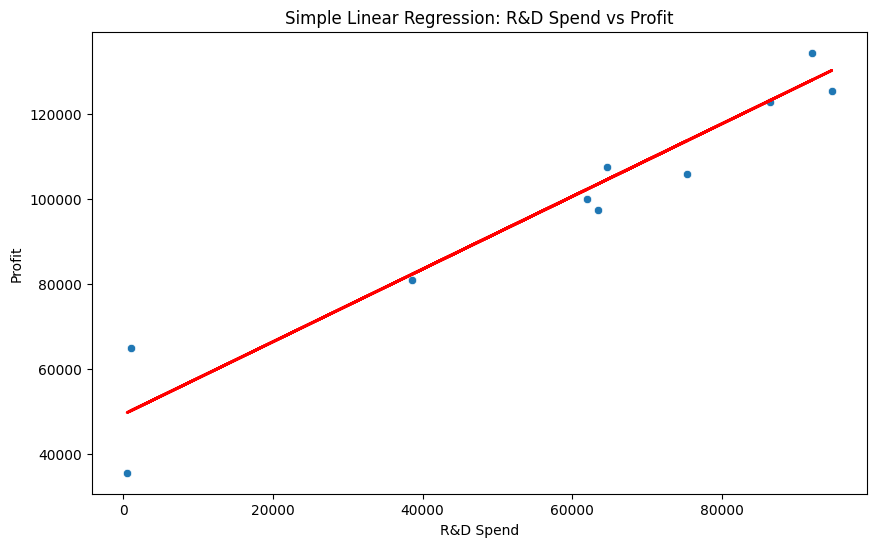

In [ ]:
# Visualize the regression line on a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test_simple['R&D Spend'], y=y_test_simple)
plt.plot(X_test_simple, y_pred_simple, color='red', linewidth=2)
plt.title('Simple Linear Regression: R&D Spend vs Profit')
plt.xlabel('R&D Spend')
plt.ylabel('Profit')
plt.show()

## Multiple Linear Regression

Now, let's perform Multiple Linear Regression using 'R&D Spend', 'Administration', and 'Marketing Spend' as the independent variables and 'Profit' as the dependent variable.

In [ ]:
# Define the independent variables (X) and the dependent variable (y) for Multiple Linear Regression
X_multiple = df[['R&D Spend', 'Administration', 'Marketing Spend']]
y_multiple = df['Profit']

# Split the data into training and testing sets
X_train_multiple, X_test_multiple, y_train_multiple, y_test_multiple = train_test_split(X_multiple, y_multiple, test_size=0.2, random_state=42)

# Create and train the Multiple Linear Regression model
multiple_linear_model = LinearRegression()
multiple_linear_model.fit(X_train_multiple, y_train_multiple)

# Make predictions on the test set
y_pred_multiple = multiple_linear_model.predict(X_test_multiple)

Let's analyze the regression coefficients of the Multiple Linear Regression model.

In [ ]:
# Analyze the regression coefficients
coefficients = pd.DataFrame({'Feature': X_multiple.columns, 'Coefficient': multiple_linear_model.coef_})
display(coefficients)

print(f'\nIntercept: {multiple_linear_model.intercept_}')

,Feature,Coefficient
0,R&D Spend,0.803779
1,Administration,-0.067929
2,Marketing Spend,0.031242



Intercept: 54071.87574599082


Let's visualize the regression line on a scatter plot.

<Axes: xlabel='R&D Spend', ylabel='Profit'>

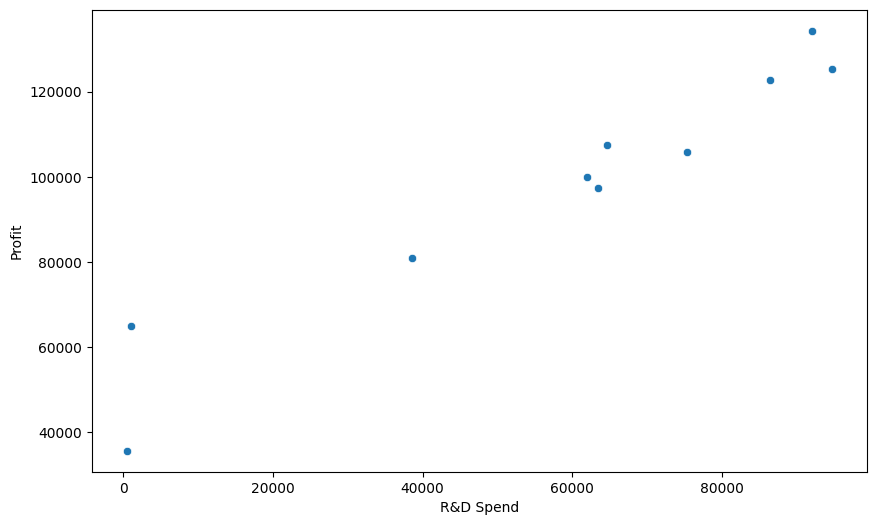

In [ ]:
# Let's visualize the regression line on a scatter plot.
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test_multiple['R&D Spend'], y=y_test_multiple)

## Model Evaluation

Now, let's evaluate the performance of both the Simple and Multiple Linear Regression models using Mean Squared Error (MSE), Mean Absolute Error (MAE), R-squared (R²), and Adjusted R-squared.

In [ ]:
# Evaluate Simple Linear Regression Model
mse_simple = mean_squared_error(y_test_simple, y_pred_simple)
mae_simple = mean_absolute_error(y_test_simple, y_pred_simple)
r2_simple = r2_score(y_test_simple, y_pred_simple)

print("Simple Linear Regression Model Evaluation:")
print(f"Mean Squared Error (MSE): {mse_simple:.2f}")
print(f"Mean Absolute Error (MAE): {mae_simple:.2f}")
print(f"R-squared (R²): {r2_simple:.2f}")

# Evaluate Multiple Linear Regression Model
mse_multiple = mean_squared_error(y_test_multiple, y_pred_multiple)
mae_multiple = mean_absolute_error(y_test_multiple, y_pred_multiple)
r2_multiple = r2_score(y_test_multiple, y_pred_multiple)

print("\nMultiple Linear Regression Model Evaluation:")
print(f"Mean Squared Error (MSE): {mse_multiple:.2f}")
print(f"Mean Absolute Error (MAE): {mae_multiple:.2f}")
print(f"R-squared (R²): {r2_multiple:.2f}")

# Calculate Adjusted R-squared for Multiple Linear Regression
# Adjusted R² = 1 - [(1-R²) * (n-1) / (n-k-1)]
# n = number of observations, k = number of predictors
n_multiple = X_test_multiple.shape[0]
k_multiple = X_test_multiple.shape[1]
adjusted_r2_multiple = 1 - (1 - r2_multiple) * (n_multiple - 1) / (n_multiple - k_multiple - 1)

print(f"Adjusted R-squared (Adjusted R²): {adjusted_r2_multiple:.2f}")

Simple Linear Regression Model Evaluation:
Mean Squared Error (MSE): 59510962.81
Mean Absolute Error (MAE): 6077.36
R-squared (R²): 0.93

Multiple Linear Regression Model Evaluation:
Mean Squared Error (MSE): 80926321.22
Mean Absolute Error (MAE): 6979.15
R-squared (R²): 0.90
Adjusted R-squared (Adjusted R²): 0.85


## Residual Analysis

Now, let's perform residual analysis for the Multiple Linear Regression model to validate the assumptions of Linear Regression.

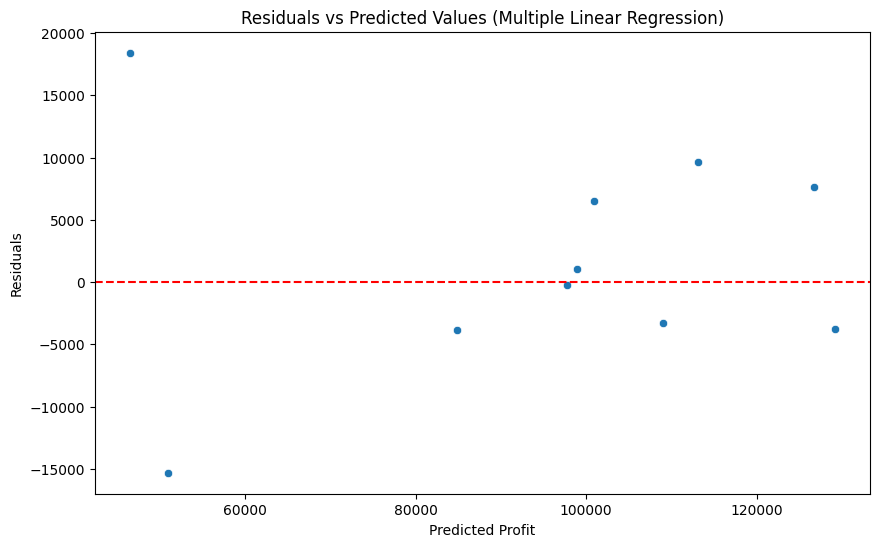

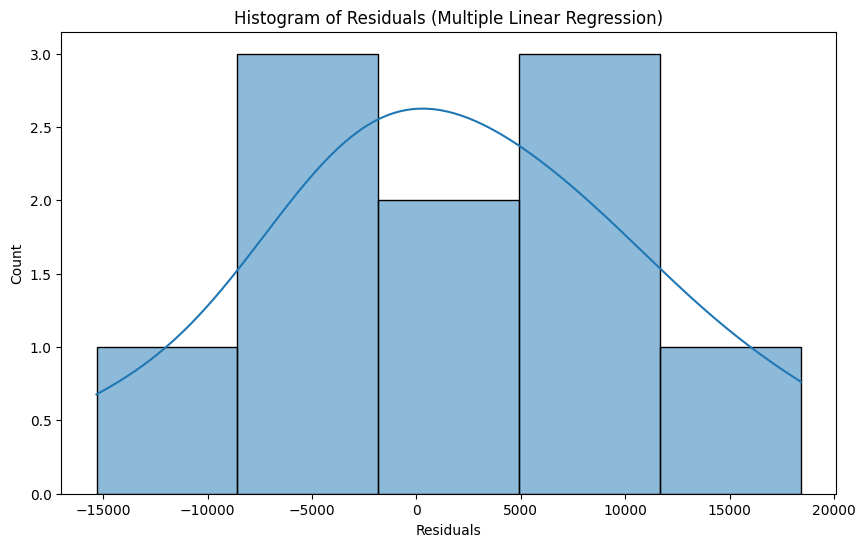

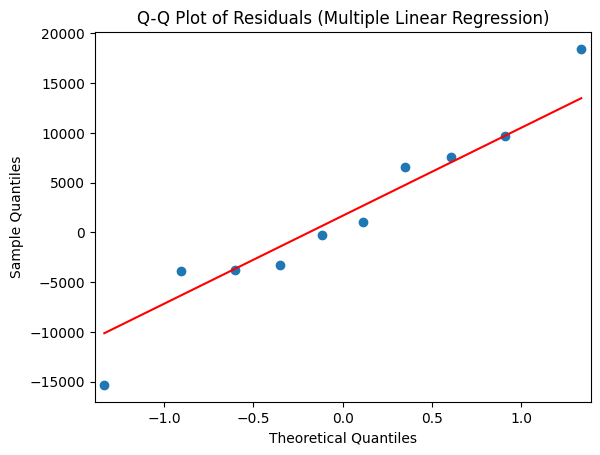

In [ ]:
# Calculate residuals for the Multiple Linear Regression model
residuals_multiple = y_test_multiple - y_pred_multiple

# Plot residuals vs predicted values (Homoscedasticity and Linearity)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred_multiple, y=residuals_multiple)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Profit')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values (Multiple Linear Regression)')
plt.show()

# Plot histogram of residuals (Normality)
plt.figure(figsize=(10, 6))
sns.histplot(residuals_multiple, kde=True)
plt.xlabel('Residuals')
plt.title('Histogram of Residuals (Multiple Linear Regression)')
plt.show()

# Plot Q-Q plot of residuals (Normality)
import statsmodels.api as sm
sm.qqplot(residuals_multiple, line='s')
plt.title('Q-Q Plot of Residuals (Multiple Linear Regression)')
plt.show()

## Model Optimization: Feature Selection

Based on the analysis, 'Administration' appears to have a weak impact on 'Profit'. Let's remove it and re-evaluate the Multiple Linear Regression model.

In [ ]:
# Define the independent variables (X) excluding 'Administration'
X_optimized = df[['R&D Spend', 'Marketing Spend']]
y_optimized = df['Profit']

# Split the data into training and testing sets
X_train_optimized, X_test_optimized, y_train_optimized, y_test_optimized = train_test_split(X_optimized, y_optimized, test_size=0.2, random_state=42)

# Create and train the Multiple Linear Regression model with selected features
optimized_linear_model = LinearRegression()
optimized_linear_model.fit(X_train_optimized, y_train_optimized)

# Make predictions on the test set
y_pred_optimized = optimized_linear_model.predict(X_test_optimized)

# Evaluate the optimized model
mse_optimized = mean_squared_error(y_test_optimized, y_pred_optimized)
mae_optimized = mean_absolute_error(y_test_optimized, y_pred_optimized)
r2_optimized = r2_score(y_test_optimized, y_pred_optimized)

print("Optimized Multiple Linear Regression Model Evaluation (Excluding Administration):")
print(f"Mean Squared Error (MSE): {mse_optimized:.2f}")
print(f"Mean Absolute Error (MAE): {mae_optimized:.2f}")
print(f"R-squared (R²): {r2_optimized:.2f}")

# Calculate Adjusted R-squared for the optimized model
# n = number of observations, k = number of predictors
n_optimized = X_test_optimized.shape[0]
k_optimized = X_test_optimized.shape[1]
adjusted_r2_optimized = 1 - (1 - r2_optimized) * (n_optimized - 1) / (n_optimized - k_optimized - 1)

print(f"Adjusted R-squared (Adjusted R²): {adjusted_r2_optimized:.2f}")

Optimized Multiple Linear Regression Model Evaluation (Excluding Administration):
Mean Squared Error (MSE): 67343832.59
Mean Absolute Error (MAE): 6469.18
R-squared (R²): 0.92
Adjusted R-squared (Adjusted R²): 0.89


## Summary of Findings

Here's a summary of our regression analysis:

**Simple Linear Regression (R&D Spend vs. Profit):**
*   The model using only 'R&D Spend' as a predictor performed quite well, with an R-squared of **0.93**. This indicates that approximately 93% of the variance in 'Profit' can be explained by 'R&D Spend'.
*   The MSE and MAE values were relatively low, suggesting good predictive accuracy for this simple model.

**Multiple Linear Regression (R&D Spend, Administration, Marketing Spend vs. Profit):**
*   The initial Multiple Linear Regression model with all three predictors had an R-squared of **0.90** and an Adjusted R-squared of **0.85**.
*   The coefficients showed that 'R&D Spend' had the largest positive impact on 'Profit', while 'Administration' had a small negative coefficient and 'Marketing Spend' had a small positive coefficient.

**Model Optimization (Excluding Administration):**
*   After removing 'Administration', the optimized Multiple Linear Regression model had an R-squared of **0.92** and an Adjusted R-squared of **0.89**.
*   The Adjusted R-squared increased after removing 'Administration', suggesting that removing this less relevant feature improved the model's ability to generalize to new data, even though the R-squared slightly decreased. This indicates that 'Administration' was likely adding noise to the model.

**Residual Analysis:**
*   The residual plots for the initial Multiple Linear Regression model showed some potential deviations from the assumptions of linearity and homoscedasticity, although with a small dataset like this, it can be harder to definitively conclude. The histogram and Q-Q plot suggested that the residuals are approximately normally distributed.

**Conclusion:**

Both the Simple Linear Regression model using 'R&D Spend' and the optimized Multiple Linear Regression model (excluding 'Administration') are good predictors of 'Profit'. The optimized Multiple Linear Regression model, with an Adjusted R-squared of 0.89, provides a slightly better fit and is likely more robust due to the removal of the less influential 'Administration' feature. 'R&D Spend' is clearly the most significant factor influencing profit in this dataset.